# Estimar Limite de Crédito de Cheque Especial

# Libs

In [35]:
import pandas as pd
import os
import seaborn as sns

from sklearn.model_selection import train_test_split

In [14]:
os.getcwd()

'/Users/emillypitman/Desktop/kaggle/linear_regression'

# Reading data

In [30]:
dados = pd.read_excel("Regressao linear multipla.xls", sheet_name="Limite_Credito")
X = dados.iloc[:, :-1].values
y = dados.iloc[:, -1].values

In [16]:
dados.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,72,4300,4300,2000,1000
1,75,4400,4400,3000,1000
2,66,4800,4800,440,1500
3,35,5000,5000,1000,1000
4,69,5000,5000,2000,2500


In [17]:
dados.shape

(48, 5)

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Idade                    48 non-null     int64
 1   RendimentoTotal          48 non-null     int64
 2   Salario                  48 non-null     int64
 3   LimitedeCreditoImediato  48 non-null     int64
 4   LimitedoChequeEspecial   48 non-null     int64
dtypes: int64(5)
memory usage: 2.0 KB


In [20]:
dados.describe().round(2)

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
count,48.00,48.00,48.00,48.00,48.00
mean,60.98,12275.08,10507.12,2175.21,5620.73
std,15.05,12640.65,9332.17,938.09,6131.90
min,30.00,4300.00,4027.00,340.00,500.00
25%,47.00,6380.00,5950.00,1925.00,2262.50
50%,66.00,8400.00,7400.00,2000.00,3550.00
75%,70.00,12378.25,10163.00,3000.00,6500.00
max,94.00,81000.00,54500.00,3500.00,35000.00


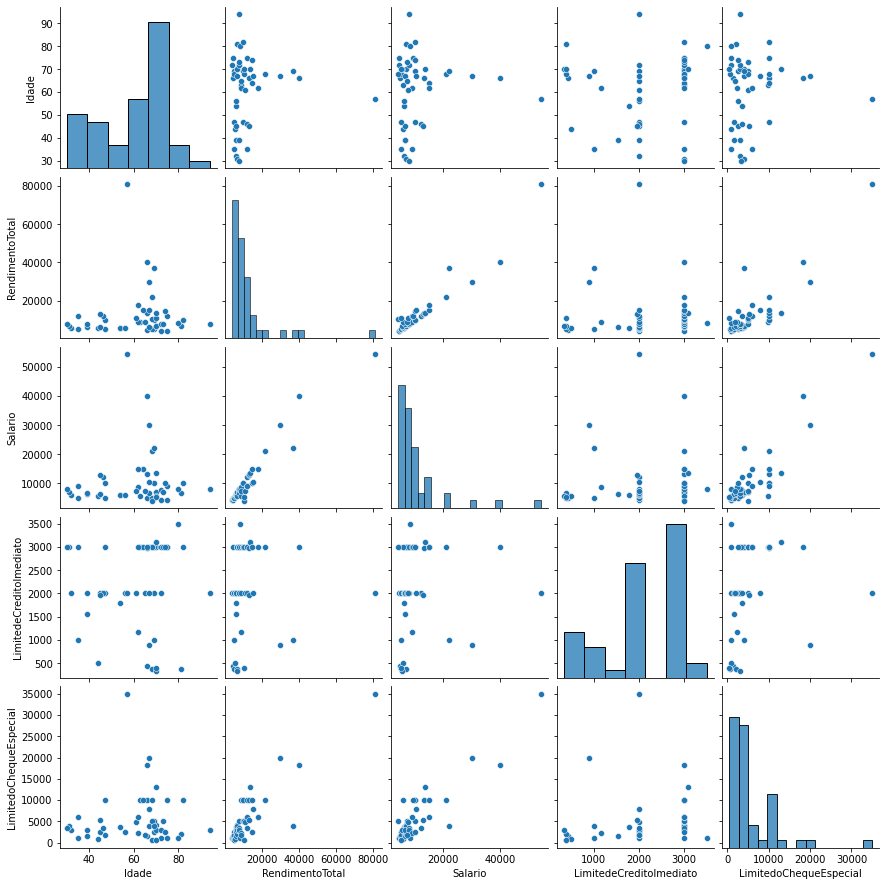

In [31]:
sns.pairplot(dados)

In [40]:
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:>

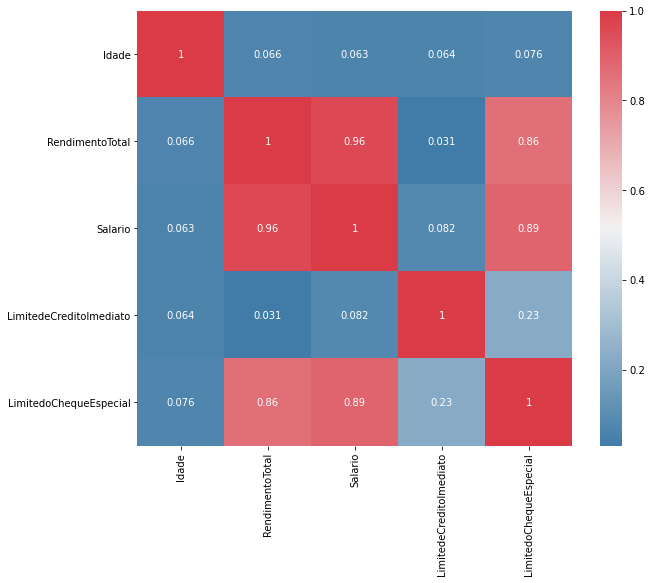

In [41]:
f, ax = plt.subplots(figsize=(10,8))
corr = dados.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
           cmap = sns.diverging_palette(240, 10, as_cmap = True), 
           square = True, ax = ax)

## Splitting the dataset into the Training set and Test set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [43]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() #build the model
regressor.fit(X_train, y_train) #train it

LinearRegression()

## Predicting the Test set results

In [44]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)#2 decimal after comma
np.concatenate(
    (
        y_pred.reshape(len(y_pred),1),
        y_test.reshape(len(y_test),1)
    ), axis=1
)

array([[ 5492.09, 10000.  ],
       [ 2033.3 ,  2500.  ],
       [ 3460.64,  1780.  ],
       [ 2656.83,  5000.  ],
       [ 3732.45,  4930.  ],
       [ 7566.89, 10000.  ],
       [ 6259.51,  3500.  ],
       [ 8530.14, 10000.  ],
       [ 1588.45,   800.  ],
       [ 3051.66,  3000.  ]])